In [17]:
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt
import matplotlib.image as img

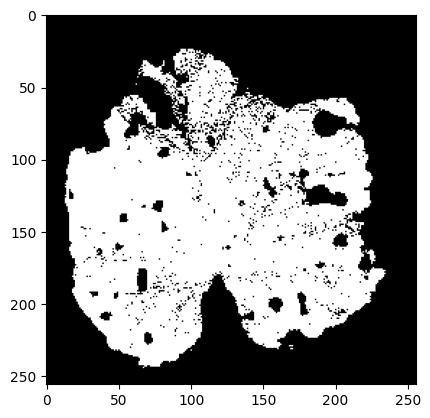

In [30]:
img = cv2.imread("anggur.jpg", 2)
ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
baris, kolom = img.shape
res = np.array(thresh/255, dtype=int)
plt.imshow(thresh,'gray')

In [21]:
kernel = np.ones((3, 3))
print(kernel)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [22]:
def padding (citdi,banyak_pad):
    imgpad=np.pad(citdi,(banyak_pad,banyak_pad),mode='symmetric')
    return imgpad

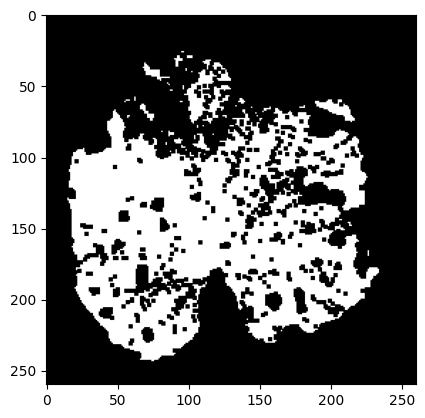

In [29]:
# Fungsi Erois
def erosi (citra):   
    hasil = np.zeros (citra.shape)
    for i in range(baris):
        for j in range(kolom):
            if((citra[i,j] == 0) or (citra[i,j+1] == 0) or (citra[i,j+2] == 0) or (citra[i+1,j] == 0) or (citra[i+1,j+1] == 0) or (citra[i+1,j+2] == 0) or (citra[i+2,j] == 0) or (citra[i+2,j+1] == 0) or (citra[i+2,j+2] == 0)):
                hasil[i,j] = hasil[i,j+1] = hasil[i,j+2] = hasil[i+1,j] = hasil[i+1,j+1] = hasil[i+1,j+2] = hasil[i+2,j] = hasil[i+2,j+1] = hasil[i+2,j+2] = 0
            else:
                hasil[i,j] = citra[i,j]
    return hasil

# erosi
bwp = padding(res,2)
erotion = erosi(bwp)
plt.imshow(erotion,'gray')

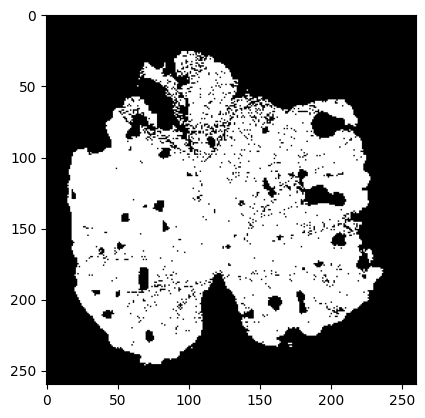

In [24]:
# Dilasi fungsi
def dilasi (citra):   
    hasil = np.zeros (citra.shape)
    for i in range(baris):
        for j in range(kolom):
            if(citra[i,j]==1):
                hasil[i,j] = hasil[i,j+1] = hasil[i,j+2] = hasil[i+1,j] = hasil[i+1,j+1] = hasil[i+1,j+2] = hasil[i+2,j] = hasil[i+2,j+1] = hasil[i+2,j+2] = 1
            elif(hasil[i,j]==1):
                hasil[i,j] = hasil[i,j]
            else:
                hasil[i,j] = citra[i,j]
    return hasil

# dilasi
bwp = padding(thresh,2)
dilasi=dilasi(bwp)
plt.imshow(dilasi,'gray')

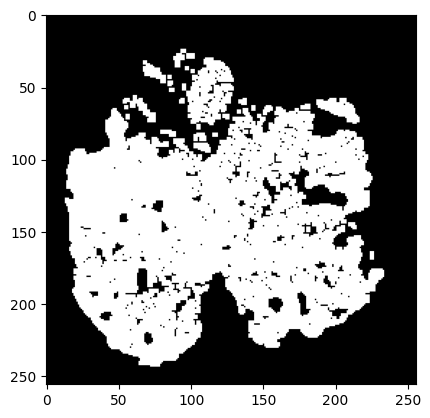

In [25]:
# opening
plt.imshow(cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel), cmap = "gray")

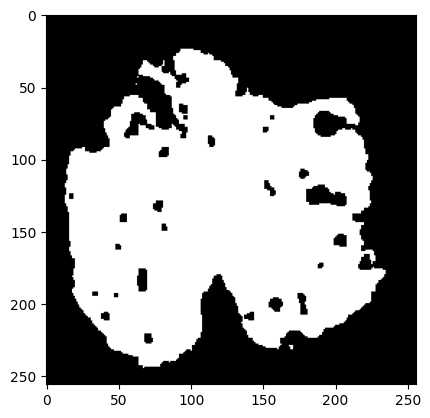

In [26]:
# closing
plt.imshow(cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel), cmap = "gray")